In [1]:
#Leo Fafoutis
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
playoffs = pd.read_csv("phs_2019_playoffs.csv")
playoffs = playoffs.drop(['start_time', 'stage'], axis=1)
#playoffs

In [3]:
playoffs = playoffs[playoffs.hero != 'All Heroes']

In [4]:
tank = ['Reinhardt', 'Sigma', 'D.Va', 'Wrecking Ball', 'Orisa', 'Winston', 'Zarya', 'Roadhog']
support = ['Ana', 'Baptiste', 'Brigitte', 'Lúcio', 'Mercy', 'Moira', 'Zen']
damage = ['Ashe', 'Bastion', 'McCree', 'Genji', 'Hanzo', 'Junkrat', 'Mei', 'Pharah', 'Reaper', 
          'Soldier 76', 'Sombra', 'Symmetra', 'Torbjorn', 'Tracer', 'Widowmaker', 'Doomfist']

In [5]:
def label_role (row):
    if row['hero'] in tank:
        return 'tank'
    if row['hero'] in support:
        return 'support'
    if row['hero'] in damage:
        return 'damage'
    return 'error'

playoffs['role'] = playoffs.apply(lambda row: label_role(row), axis=1)

In [6]:
playoffs.head()

,match_id,map_type,map_name,player,team,stat_name,hero,stat_amount,role
28,30172,CONTROL,Ilios,Elsa,Chengdu Hunters,All Damage Done,D.Va,13934.906430,tank
29,30172,CONTROL,Ilios,Elsa,Chengdu Hunters,Assists,D.Va,15.000000,tank
30,30172,CONTROL,Ilios,Elsa,Chengdu Hunters,Average Time Alive,D.Va,569.509017,tank
31,30172,CONTROL,Ilios,Elsa,Chengdu Hunters,Barrier Damage Done,D.Va,6703.071256,tank
32,30172,CONTROL,Ilios,Elsa,Chengdu Hunters,Critical Hit Accuracy,D.Va,0.092603,tank


In [7]:
players = playoffs.player.unique()
players

array(['Elsa', 'JinMu', 'Kyo', 'YangXiaoLong', 'Yveltal', 'ameng',
       'Chara', 'Eileen', 'HOTBA', 'Rio', 'nero', 'shu', 'Happy',
       'Boombox', 'Poko', 'SADO', 'carpe', 'eqo', 'neptuNo', 'CoMa',
       'Envy', 'Gamsu', 'IZaYaKI', 'YOUNGJIN', 'diem', 'DDing', 'Bdosin',
       'Birdring', 'Fury', 'Gesture', 'Profit', 'QuaterMain', 'Fits',
       'Fleta', 'Marve1', 'Michelle', 'ryujehong', 'tobi', 'Haksal',
       'JJANU', 'SLIME', 'SeoMinSoo', 'TiZi', 'Twilight', 'BEBE', 'Bazzi',
       'GodsB', 'Guxue', 'Ria', 'iDK', 'BigG00se', 'Hydration', 'Shaz',
       'Surefour', 'Void', 'rOar', 'Adora', 'Decay', 'Guard', 'Anamo',
       'Fl0w3R', 'JJonak', 'Mano', 'MekO', 'SAEBYEOLBE', 'Libero',
       'Dogman', 'Erster', 'Gator', 'Masaa', 'Pokpo', 'babybay',
       'Choihyobin', 'STRIKER', 'Viol2t', 'moth', 'sinatraa', 'smurf',
       'Rascal', 'NUS', 'Architect', 'Nevix', 'super'], dtype=object)

In [8]:
append_player = []

for p in players:
    x = playoffs.loc[playoffs['player'] == p]
    role = playoffs.loc[playoffs['player'] == p]['role']
    team = playoffs.loc[playoffs['player'] == p]['team']
    
    tp = x.loc[x['stat_name'] == 'Time Played']
    time_played = tp['stat_amount'].sum()
    
    dt = x.loc[x['stat_name'] == 'Deaths']
    deaths = dt['stat_amount'].sum()
    
    elim = x.loc[x['stat_name'] == 'Eliminations']
    eliminations = elim['stat_amount'].sum()
    
    fb = x.loc[x['stat_name'] == 'Final Blows']
    final_blows = fb['stat_amount'].sum()
    
    assi = x.loc[x['stat_name'] == 'Assists']
    assists = assi['stat_amount'].sum()
    
    alldd = x.loc[x['stat_name'] == 'All Damage Done']
    all_damage_done = alldd['stat_amount'].sum()
    
    db = x.loc[x['stat_name'] == 'Damage Blocked']
    damage_blocked = db['stat_amount'].sum()
    
    dt = x.loc[x['stat_name'] == 'Damage Taken']
    damage_taken = dt['stat_amount'].sum()
    
    herodd = x.loc[x['stat_name'] == 'Hero Damage Done']
    hero_damage_done = herodd['stat_amount'].sum()
    
    he = x.loc[x['stat_name'] == 'Healing Done']
    healing_done = he['stat_amount'].sum()
    
    append_player.append([p, role.iloc[0], team.iloc[0], time_played, eliminations, final_blows, assists, deaths, 
                          all_damage_done, hero_damage_done, damage_blocked, damage_taken, healing_done])

In [9]:
player_stats = pd.DataFrame(append_player, columns = ['player', 'role', 'team', 'time_played', 'eliminations', 'final_blows', 
                                                      'assists', 'deaths', 'all_damage_done', 'hero_damage_done', 'damage_blocked', 'damage_taken', 'healing_done'])
player_stats.head()

,player,role,team,time_played,eliminations,final_blows,assists,deaths,all_damage_done,hero_damage_done,damage_blocked,damage_taken,healing_done
0,Elsa,tank,Chengdu Hunters,3498.163487,90.0,35.0,54.0,35.0,78813.946835,35643.738028,71868.736370,58973.418665,0.000000
1,JinMu,damage,Chengdu Hunters,3498.163487,95.0,60.0,34.0,50.0,89472.716591,43849.816894,0.000000,30350.028669,0.000000
2,Kyo,support,Chengdu Hunters,3498.163487,98.0,24.0,74.0,31.0,38001.950358,26834.042363,0.000000,22157.011539,64119.250791
3,YangXiaoLong,damage,Chengdu Hunters,3498.163487,82.0,24.0,58.0,50.0,78420.876844,32839.213115,9014.902748,27648.442155,0.000000
4,Yveltal,support,Chengdu Hunters,3498.163487,33.0,12.0,20.0,35.0,13237.696258,7500.577831,0.000000,19125.635731,49803.365637


In [10]:
columns = ['eliminations', 'final_blows', 'assists', 'deaths', 'all_damage_done', 'hero_damage_done', 'damage_blocked', 'damage_taken', 'healing_done']

for c in columns:
    
    def per_ten (row):
        return ((600 * row[c]) / row['time_played'])

    player_stats[c] = player_stats.apply(lambda row: per_ten(row), axis=1)

In [11]:
player_stats.head()

,player,role,team,time_played,eliminations,final_blows,assists,deaths,all_damage_done,hero_damage_done,damage_blocked,damage_taken,healing_done
0,Elsa,tank,Chengdu Hunters,3498.163487,15.436671,6.003150,9.262003,6.003150,13518.055480,6113.562986,12326.822911,10115.036455,0.000000
1,JinMu,damage,Chengdu Hunters,3498.163487,16.294264,10.291114,5.831631,8.575929,15346.232430,7521.057901,0.000000,5205.593526,0.000000
2,Kyo,support,Chengdu Hunters,3498.163487,16.808820,4.116446,12.692374,5.317076,6518.040194,4602.536581,0.000000,3800.338941,10997.642224
3,YangXiaoLong,damage,Chengdu Hunters,3498.163487,14.064523,4.116446,9.948077,8.575929,13450.636678,5632.534883,1546.223231,4742.221269,0.000000
4,Yveltal,support,Chengdu Hunters,3498.163487,5.660113,2.058223,3.430371,6.003150,2270.510736,1286.488386,0.000000,3280.401697,8542.202070


In [12]:
player_stats = player_stats[player_stats['time_played'] >= 1200]
player_stats

,player,role,team,time_played,eliminations,final_blows,assists,deaths,all_damage_done,hero_damage_done,damage_blocked,damage_taken,healing_done
0,Elsa,tank,Chengdu Hunters,3498.163487,15.436671,6.003150,9.262003,6.003150,13518.055480,6113.562986,12326.822911,10115.036455,0.000000
1,JinMu,damage,Chengdu Hunters,3498.163487,16.294264,10.291114,5.831631,8.575929,15346.232430,7521.057901,0.000000,5205.593526,0.000000
2,Kyo,support,Chengdu Hunters,3498.163487,16.808820,4.116446,12.692374,5.317076,6518.040194,4602.536581,0.000000,3800.338941,10997.642224
3,YangXiaoLong,damage,Chengdu Hunters,3498.163487,14.064523,4.116446,9.948077,8.575929,13450.636678,5632.534883,1546.223231,4742.221269,0.000000
4,Yveltal,support,Chengdu Hunters,3498.163487,5.660113,2.058223,3.430371,6.003150,2270.510736,1286.488386,0.000000,3280.401697,8542.202070
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,sinatraa,damage,San Francisco Shock,17413.605518,23.223220,11.232596,11.990624,6.305414,13480.414974,8509.802416,154.843549,7222.756482,2.238924
77,smurf,tank,San Francisco Shock,22202.566157,21.997457,4.675135,17.295298,5.918235,15793.131129,5812.403495,20423.271692,9838.326945,0.000000
78,Rascal,damage,San Francisco Shock,6211.166533,24.053453,8.404218,15.552634,5.409612,17039.293828,8715.729860,4856.452063,5541.179793,0.000000
79,NUS,support,London Spitfire,3393.073868,7.073232,1.591477,5.304924,5.481755,4515.641492,1565.947588,0.000000,3173.376017,8560.525761


In [13]:
tank_df = player_stats[player_stats['role'] == 'tank']
damage_df = player_stats[player_stats['role'] == 'damage']
support_df = player_stats[player_stats['role'] == 'support']

tank_df.head()

,player,role,team,time_played,eliminations,final_blows,assists,deaths,all_damage_done,hero_damage_done,damage_blocked,damage_taken,healing_done
0,Elsa,tank,Chengdu Hunters,3498.163487,15.436671,6.003150,9.262003,6.003150,13518.055480,6113.562986,12326.822911,10115.036455,0.0
5,ameng,tank,Chengdu Hunters,3498.163487,12.520856,1.372149,10.977188,8.232891,11551.170264,4740.750125,13979.642293,10826.026007,0.0
8,HOTBA,tank,Guangzhou Charge,8551.738904,20.416900,6.524989,13.821750,4.700798,18664.522404,10178.403621,15039.548751,8212.293321,0.0
9,Rio,tank,Guangzhou Charge,8551.738904,15.996747,3.016930,12.979816,5.823377,13930.162221,4611.205186,22859.774330,8461.234009,0.0
14,Poko,tank,Philadelphia Fusion,6457.880113,18.117400,6.132043,11.985357,4.273848,17116.883495,7250.029507,18319.923811,7227.170814,0.0


In [14]:
# TANK ANALYSIS

colors = ["purple", "green", "blue", "pink", "brown", "red", "light blue", "teal", "orange", "light green", "magenta", "yellow", "grey", "dark green", "dark blue", 
          "tan", "cyan", "bright green", "lilac", "hot pink", "olive green", "mustard", "periwinkle", "light pink", "plum", "brick red", "dark brown", "chartreuse", 
          "dark orange", "slate", "sea blue", "twilight blue"]
new_palette = sns.xkcd_palette(colors)

Text(20.800000000000004, 0.5, 'Deaths / 10 mins')

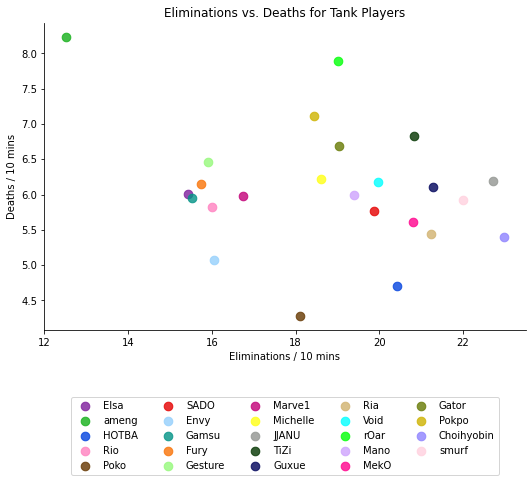

In [15]:
sns.lmplot(x="eliminations", y="deaths", data=tank_df, fit_reg=False, legend=False, hue='player', palette=new_palette, size=5, aspect=1.5, scatter_kws={"s": 75})
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
plt.title('Eliminations vs. Deaths for Tank Players')
plt.xlabel('Eliminations / 10 mins')
plt.ylabel('Deaths / 10 mins')

In [16]:
tank_df['expected_deaths'] = tank_df.apply(lambda row: (row['damage_taken'] / (425)), axis=1)
tank_df.head()

,player,role,team,time_played,eliminations,final_blows,assists,deaths,all_damage_done,hero_damage_done,damage_blocked,damage_taken,healing_done,expected_deaths
0,Elsa,tank,Chengdu Hunters,3498.163487,15.436671,6.003150,9.262003,6.003150,13518.055480,6113.562986,12326.822911,10115.036455,0.0,23.800086
5,ameng,tank,Chengdu Hunters,3498.163487,12.520856,1.372149,10.977188,8.232891,11551.170264,4740.750125,13979.642293,10826.026007,0.0,25.473002
8,HOTBA,tank,Guangzhou Charge,8551.738904,20.416900,6.524989,13.821750,4.700798,18664.522404,10178.403621,15039.548751,8212.293321,0.0,19.323043
9,Rio,tank,Guangzhou Charge,8551.738904,15.996747,3.016930,12.979816,5.823377,13930.162221,4611.205186,22859.774330,8461.234009,0.0,19.908786
14,Poko,tank,Philadelphia Fusion,6457.880113,18.117400,6.132043,11.985357,4.273848,17116.883495,7250.029507,18319.923811,7227.170814,0.0,17.005108


Text(24.956250000000004, 0.5, 'expected deaths / 10 mins')

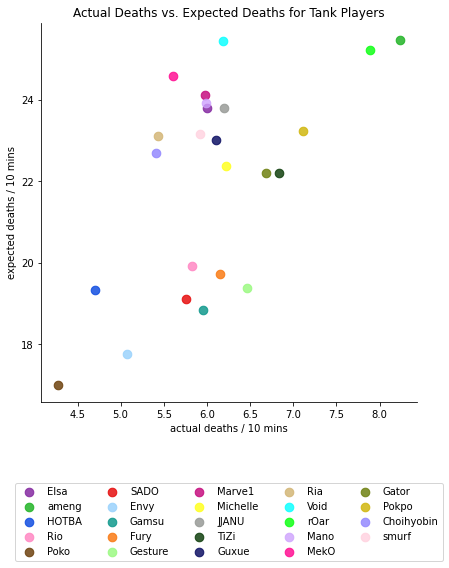

In [17]:
sns.lmplot(x="deaths", y="expected_deaths", data=tank_df, fit_reg=False, legend=False, hue='player', palette=new_palette, size=6, aspect=1, scatter_kws={"s": 75})
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
plt.title('Actual Deaths vs. Expected Deaths for Tank Players')
plt.xlabel('actual deaths / 10 mins')
plt.ylabel('expected deaths / 10 mins')

In [18]:
tank_df['tankiness'] = tank_df.apply(lambda row: (row['expected_deaths'] / row['deaths']), axis=1)
tank_df.head()

,player,role,team,time_played,eliminations,final_blows,assists,deaths,all_damage_done,hero_damage_done,damage_blocked,damage_taken,healing_done,expected_deaths,tankiness
0,Elsa,tank,Chengdu Hunters,3498.163487,15.436671,6.003150,9.262003,6.003150,13518.055480,6113.562986,12326.822911,10115.036455,0.0,23.800086,3.964600
5,ameng,tank,Chengdu Hunters,3498.163487,12.520856,1.372149,10.977188,8.232891,11551.170264,4740.750125,13979.642293,10826.026007,0.0,25.473002,3.094053
8,HOTBA,tank,Guangzhou Charge,8551.738904,20.416900,6.524989,13.821750,4.700798,18664.522404,10178.403621,15039.548751,8212.293321,0.0,19.323043,4.110588
9,Rio,tank,Guangzhou Charge,8551.738904,15.996747,3.016930,12.979816,5.823377,13930.162221,4611.205186,22859.774330,8461.234009,0.0,19.908786,3.418770
14,Poko,tank,Philadelphia Fusion,6457.880113,18.117400,6.132043,11.985357,4.273848,17116.883495,7250.029507,18319.923811,7227.170814,0.0,17.005108,3.978875


Text(5.831250000000004, 0.5, 'damage_blocked / 10 mins')

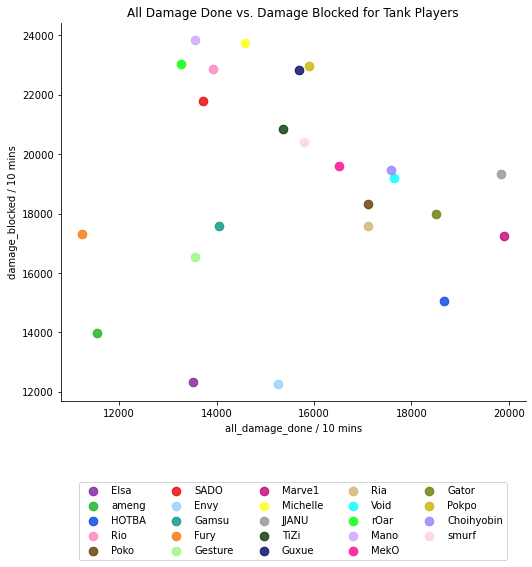

In [19]:
sns.lmplot(x="all_damage_done", y="damage_blocked", data=tank_df, fit_reg=False, legend=False, hue='player', palette=new_palette, size=6, aspect=1.25, scatter_kws={"s": 75})
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
plt.title('All Damage Done vs. Damage Blocked for Tank Players')
plt.xlabel('all_damage_done / 10 mins')
plt.ylabel('damage_blocked / 10 mins')

In [20]:
# TANK PIR
columns = ['eliminations', 'final_blows', 'assists', 'deaths', 'all_damage_done', 'hero_damage_done', 'damage_blocked', 'damage_taken', 'tankiness']

for c in columns:
    
    def norm_data (row):
        all_values = tank_df[c]
        range_values = all_values.max() - all_values.min()
    
        norm_values = (row[c] - all_values.min()) / range_values
    
        return norm_values

    tank_df[c] = tank_df.apply(lambda row: norm_data(row), axis=1)

In [21]:
def tank_pir (row):
    
    rating = row['eliminations'] - row['deaths'] + row['all_damage_done'] + row['damage_blocked'] + (row['tankiness'] / 2) + row['assists']
    
    return rating

tank_df['PIR'] = tank_df.apply(lambda row: tank_pir(row), axis=1)

In [22]:
tank_df.PIR = tank_df.PIR.astype(float)
tank_ranks = tank_df.sort_values('PIR')

<AxesSubplot:xlabel='player', ylabel='PIR'>

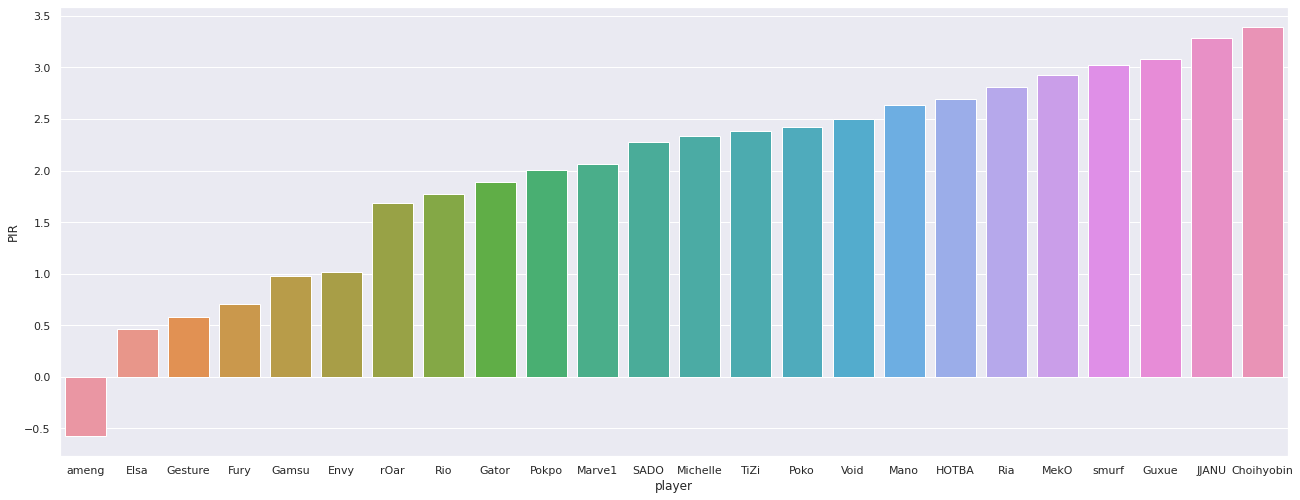

In [23]:
sns.set(rc={'figure.figsize':(22,8.27)})
sns.barplot(data=tank_ranks, x="player", y="PIR")

Text(25.960000000000008, 0.5, 'Deaths / 10 mins')

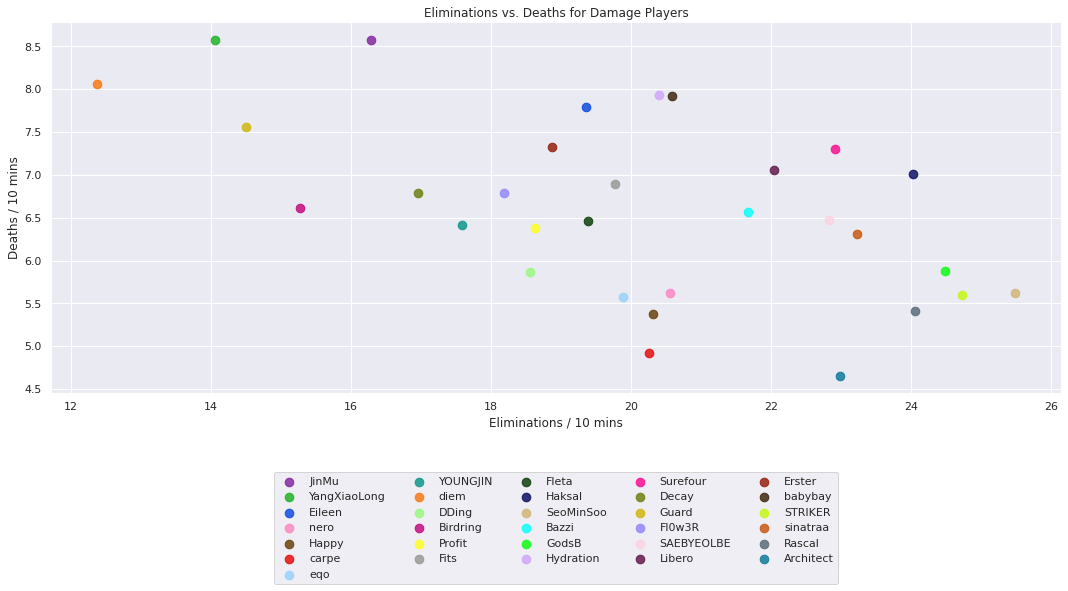

In [24]:
# Damage Analysis

sns.lmplot(x="eliminations", y="deaths", data=damage_df, fit_reg=False, legend=False, hue='player', palette=new_palette, size=6, aspect=2.5, scatter_kws={"s": 75})
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
plt.title('Eliminations vs. Deaths for Damage Players')
plt.xlabel('Eliminations / 10 mins')
plt.ylabel('Deaths / 10 mins')

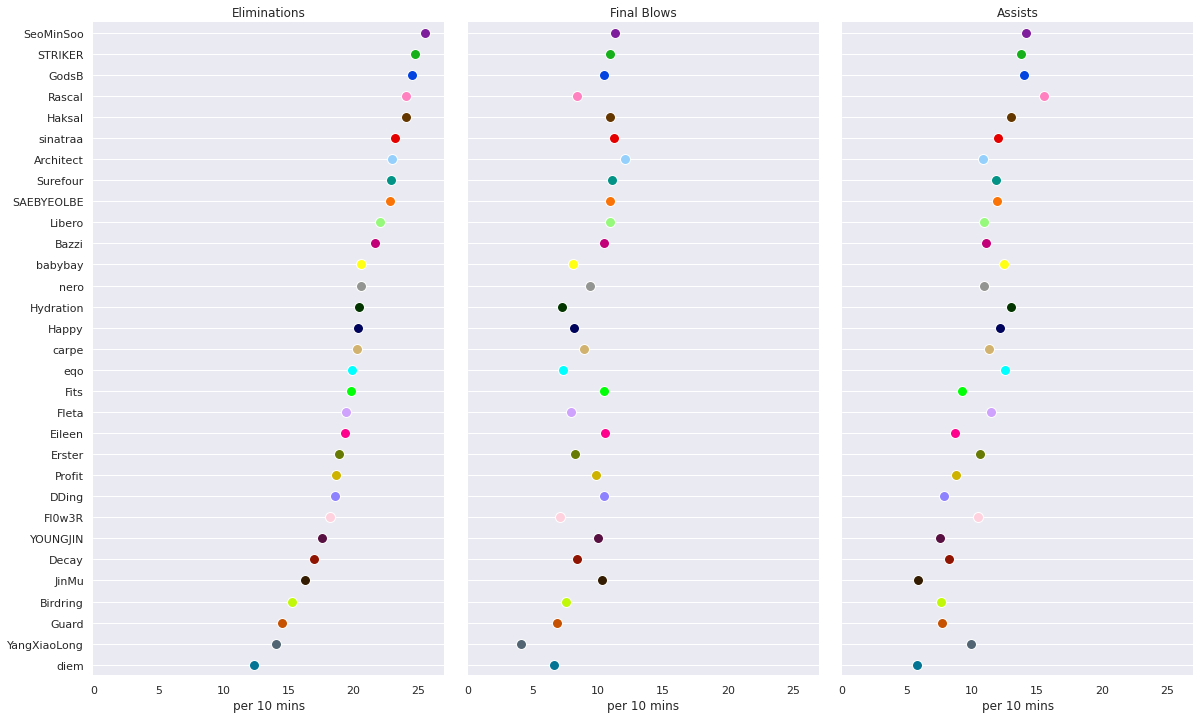

In [25]:
# Make the PairGrid
g = sns.PairGrid(damage_df.sort_values("eliminations", ascending=False),x_vars=damage_df.columns[4:7], y_vars=["player"],height=10, aspect=.55)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False, palette=new_palette, linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 27), xlabel="per 10 mins", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Eliminations", "Final Blows", "Assists"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [26]:
damage_df['expected_elims'] = damage_df.apply(lambda row: (row['hero_damage_done'] / (291)), axis=1)
damage_df.head()

,player,role,team,time_played,eliminations,final_blows,assists,deaths,all_damage_done,hero_damage_done,damage_blocked,damage_taken,healing_done,expected_elims
1,JinMu,damage,Chengdu Hunters,3498.163487,16.294264,10.291114,5.831631,8.575929,15346.232430,7521.057901,0.000000,5205.593526,0.0,25.845560
3,YangXiaoLong,damage,Chengdu Hunters,3498.163487,14.064523,4.116446,9.948077,8.575929,13450.636678,5632.534883,1546.223231,4742.221269,0.0,19.355790
7,Eileen,damage,Guangzhou Charge,8551.738904,19.364483,10.524175,8.699985,7.787890,11614.226976,7326.085807,0.000000,6526.211764,0.0,25.175553
10,nero,damage,Guangzhou Charge,5982.105991,20.561321,9.428118,10.932605,5.616751,15419.611553,8710.263406,0.000000,5008.032877,0.0,29.932177
12,Happy,damage,Guangzhou Charge,2569.632913,20.314186,8.172374,12.141812,5.370417,15518.655194,6757.202065,0.000000,5602.140228,0.0,23.220626


In [27]:
damage_df['damage_eff'] = damage_df.apply(lambda row: (row['expected_elims'] / row['eliminations']), axis=1)
damage_df.head()

,player,role,team,time_played,eliminations,final_blows,assists,deaths,all_damage_done,hero_damage_done,damage_blocked,damage_taken,healing_done,expected_elims,damage_eff
1,JinMu,damage,Chengdu Hunters,3498.163487,16.294264,10.291114,5.831631,8.575929,15346.232430,7521.057901,0.000000,5205.593526,0.0,25.845560,1.586175
3,YangXiaoLong,damage,Chengdu Hunters,3498.163487,14.064523,4.116446,9.948077,8.575929,13450.636678,5632.534883,1546.223231,4742.221269,0.0,19.355790,1.376214
7,Eileen,damage,Guangzhou Charge,8551.738904,19.364483,10.524175,8.699985,7.787890,11614.226976,7326.085807,0.000000,6526.211764,0.0,25.175553,1.300089
10,nero,damage,Guangzhou Charge,5982.105991,20.561321,9.428118,10.932605,5.616751,15419.611553,8710.263406,0.000000,5008.032877,0.0,29.932177,1.455752
12,Happy,damage,Guangzhou Charge,2569.632913,20.314186,8.172374,12.141812,5.370417,15518.655194,6757.202065,0.000000,5602.140228,0.0,23.220626,1.143074


Text(29.334999999999994, 0.5, 'expected elims / 10 mins')

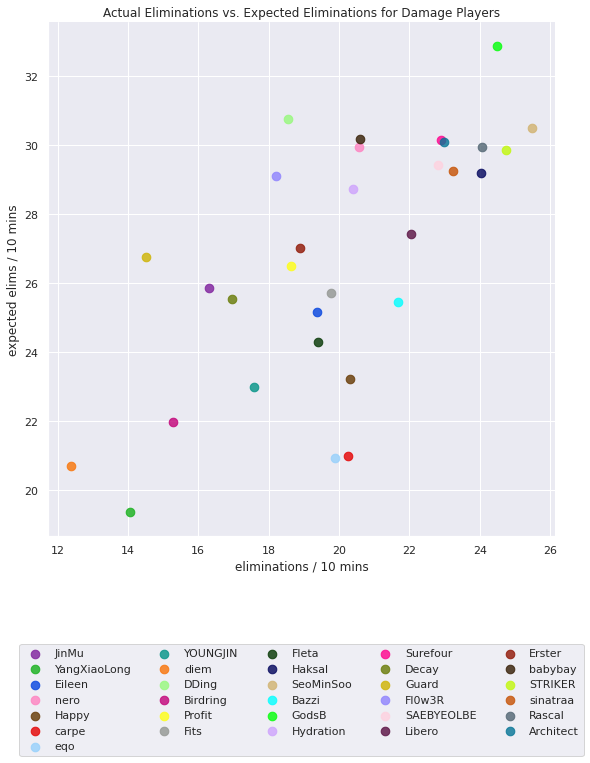

In [28]:
sns.lmplot(x="eliminations", y="expected_elims", data=damage_df, fit_reg=False, legend=False, hue='player', palette=new_palette, size=8, aspect=1, scatter_kws={"s": 75})
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
plt.title('Actual Eliminations vs. Expected Eliminations for Damage Players')
plt.xlabel('eliminations / 10 mins')
plt.ylabel('expected elims / 10 mins')

In [29]:
columns = ['eliminations', 'final_blows', 'assists', 'deaths', 'all_damage_done', 'hero_damage_done', 'damage_blocked', 'damage_taken', 'damage_eff']

for c in columns:
    
    def norm_data (row):
        all_values = damage_df[c]
        range_values = all_values.max() - all_values.min()
    
        norm_values = (row[c] - all_values.min()) / range_values
    
        return norm_values

    damage_df[c] = damage_df.apply(lambda row: norm_data(row), axis=1)

In [30]:
def damage_pir (row):
    
    rating = row['eliminations'] - row['deaths'] + (row['damage_eff'] * 1.2) + row['assists'] + (row['final_blows'] * 1.3)
    
    return rating

damage_df['PIR'] = damage_df.apply(lambda row: damage_pir(row), axis=1)

In [31]:
damage_df.PIR = damage_df.PIR.astype(float)
damage_ranks = damage_df.sort_values('PIR')

<AxesSubplot:xlabel='player', ylabel='PIR'>

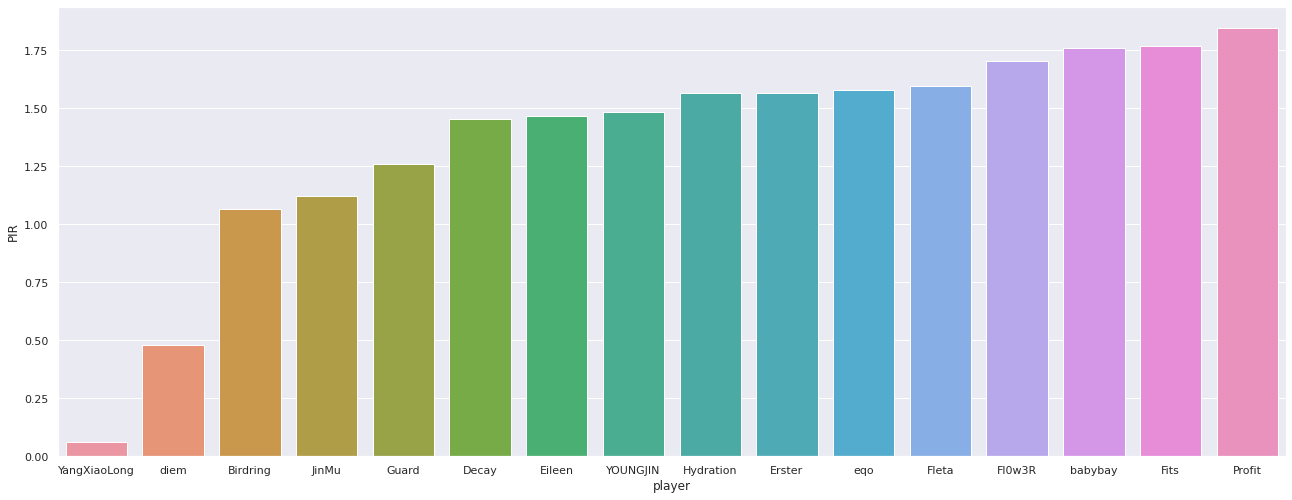

In [32]:
sns.set(rc={'figure.figsize':(22,8.27)})
sns.barplot(data=damage_ranks.iloc[:16], x="player", y="PIR")

<AxesSubplot:xlabel='player', ylabel='PIR'>

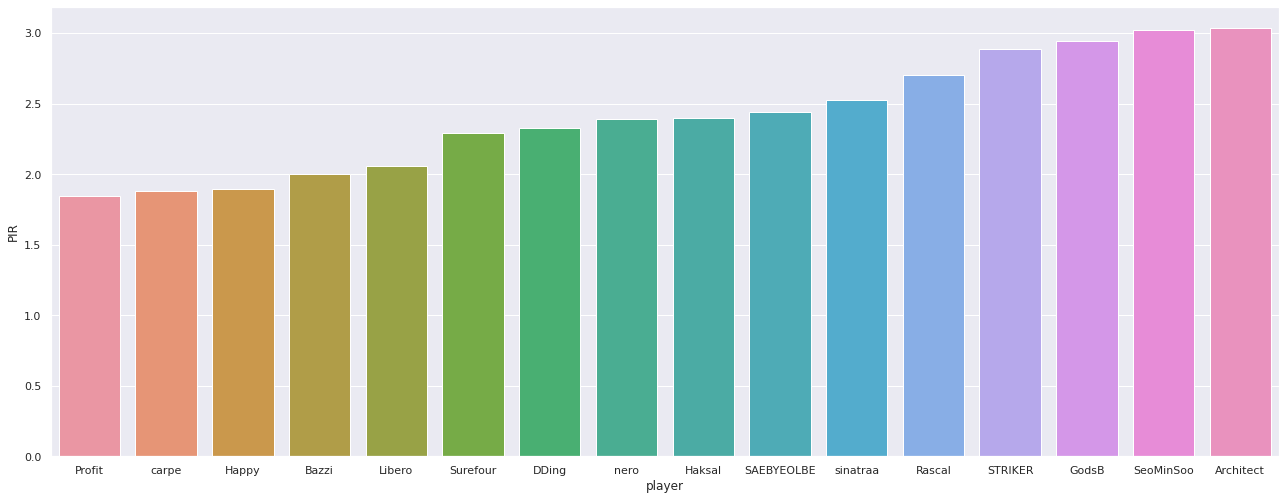

In [33]:
sns.set(rc={'figure.figsize':(22,8.27)})
sns.barplot(data=damage_ranks.iloc[15:], x="player", y="PIR")

Text(25.960000000000008, 0.5, 'Deaths / 10 mins')

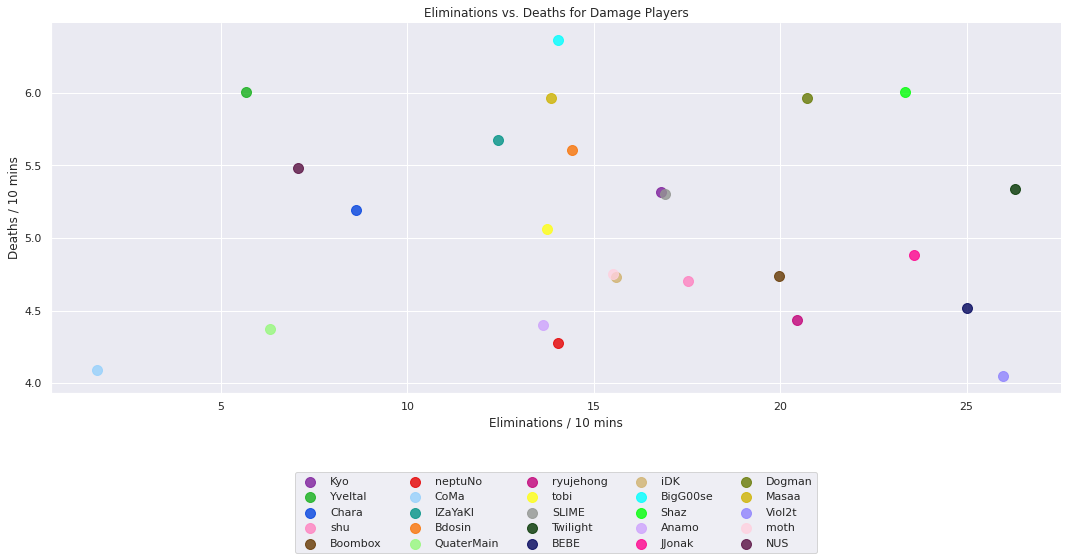

In [34]:
# Support Analysis

sns.lmplot(x="eliminations", y="deaths", data=support_df, fit_reg=False, legend=False, hue='player', palette=new_palette, size=6, aspect=2.5, scatter_kws={"s": 100})
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
plt.title('Eliminations vs. Deaths for Damage Players')
plt.xlabel('Eliminations / 10 mins')
plt.ylabel('Deaths / 10 mins')

<AxesSubplot:xlabel='healing_done', ylabel='player'>

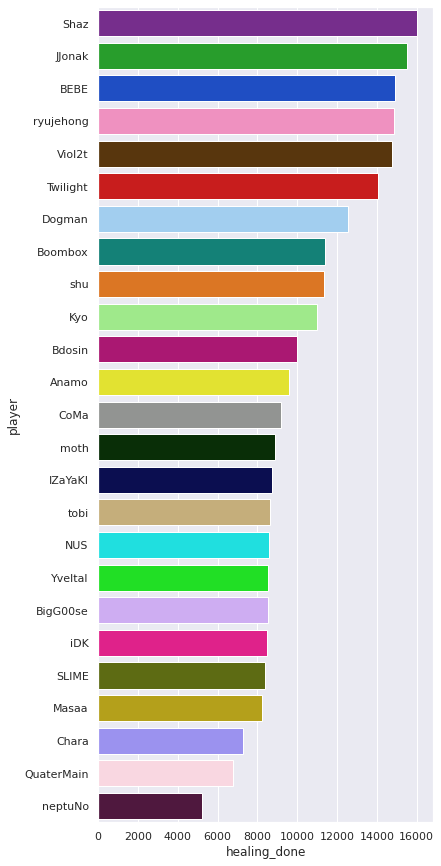

In [35]:
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
support_healing = support_df.sort_values("healing_done", ascending=False)
sns.barplot(x="healing_done", y="player", data=support_healing, palette=new_palette, label="healing_done", color="g")

In [36]:
columns = ['eliminations', 'final_blows', 'assists', 'deaths', 'all_damage_done', 'hero_damage_done', 'damage_blocked', 'damage_taken', 'healing_done']

for c in columns:
    
    def norm_data (row):
        all_values = support_df[c]
        range_values = all_values.max() - all_values.min()
    
        norm_values = (row[c] - all_values.min()) / range_values
    
        return norm_values

    support_df[c] = support_df.apply(lambda row: norm_data(row), axis=1)

In [37]:
def support_pir (row):
    
    rating = row['eliminations'] - row['deaths'] + row['healing_done'] + row['assists']
    
    return rating

support_df['PIR'] = support_df.apply(lambda row: support_pir(row), axis=1)

<AxesSubplot:xlabel='player', ylabel='PIR'>

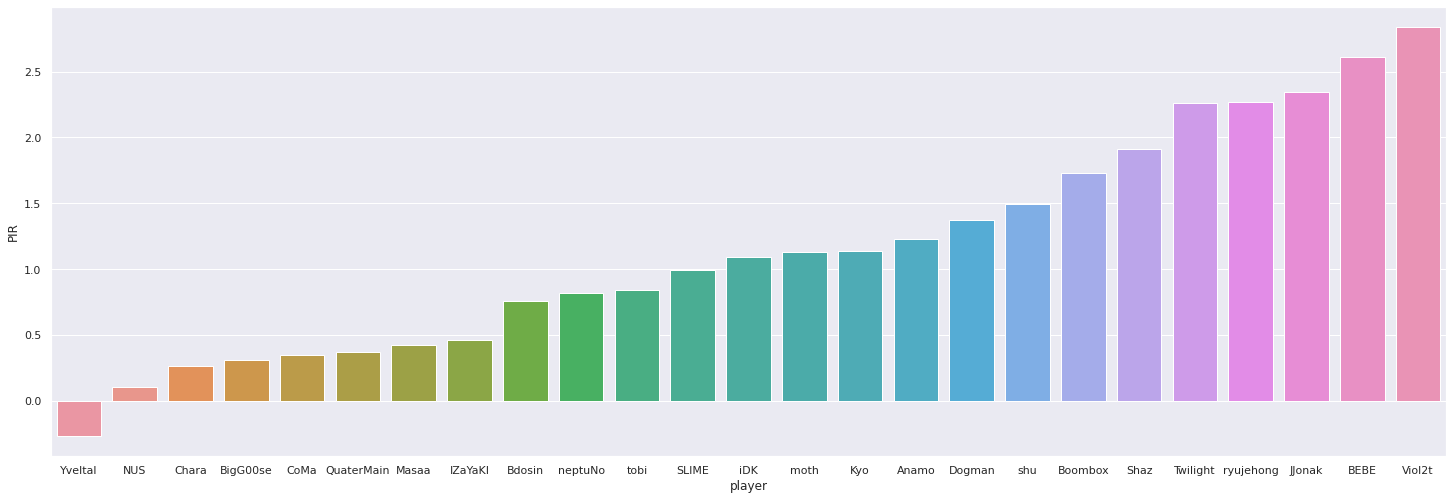

In [38]:
support_df.PIR = support_df.PIR.astype(float)
support_ranks = support_df.sort_values('PIR')
sns.set(rc={'figure.figsize':(25,8.27)})
sns.barplot(data=support_ranks, x="player", y="PIR")

In [39]:
# Hypothesis Testing
tank_pir_group = tank_df.groupby('team')['PIR'].sum()
damage_pir_group = damage_df.groupby('team')['PIR'].sum()
support_pir_group = support_df.groupby('team')['PIR'].sum()

In [40]:
team_list = playoffs.team.unique()
temp_tank = []
temp_damage = []
temp_support = []
temp_all = []

for t in team_list:
    temp_tank.append([t, tank_pir_group[t]])
    temp_damage.append([t, damage_pir_group[t]])
    temp_support.append([t, support_pir_group[t]])
    temp_all.append([t, tank_pir_group[t] + damage_pir_group[t] + support_pir_group[t]])
    
tank_team_ranks = pd.DataFrame(temp_tank, columns = ['team', 'team_PIR'])
damage_team_ranks = pd.DataFrame(temp_damage, columns = ['team', 'team_PIR'])
support_team_ranks = pd.DataFrame(temp_support, columns = ['team', 'team_PIR'])
all_team_ranks = pd.DataFrame(temp_all, columns = ['team', 'team_PIR'])

In [44]:
tank_team_ranks = tank_team_ranks.sort_values('team_PIR', ascending=False)
damage_team_ranks = damage_team_ranks.sort_values('team_PIR', ascending=False)
support_team_ranks = support_team_ranks.sort_values('team_PIR', ascending=False)
all_team_ranks = all_team_ranks.sort_values('team_PIR', ascending=False)

In [45]:
def label_result (row):
    if row['team'] == 'Chengdu Hunters':
        return 12
    if row['team'] == 'Philadelphia Fusion':
        return 11
    if row['team'] == 'Shanghai Dragons':
        return 10
    if row['team'] == 'Guangzhou Charge':
        return 9
    if row['team'] == 'London Spitfire':
        return 8
    if row['team'] == 'Seoul Dynasty':
        return 7
    if row['team'] == 'Los Angeles Gladiators':
        return 6
    if row['team'] == 'Atlanta Reign':
        return 5
    if row['team'] == 'Hangzhou Spark':
        return 4
    if row['team'] == 'New York Excelsior':
        return 3
    if row['team'] == 'Vancouver Titans':
        return 2
    if row['team'] == 'San Francisco Shock':
        return 1
    return 0

tank_team_ranks['standing'] = tank_team_ranks.apply(lambda row: label_result(row), axis=1)
damage_team_ranks['standing'] = damage_team_ranks.apply(lambda row: label_result(row), axis=1)
support_team_ranks['standing'] = support_team_ranks.apply(lambda row: label_result(row), axis=1)
all_team_ranks['standing'] = all_team_ranks.apply(lambda row: label_result(row), axis=1)

In [56]:
all_team_ranks

,team,team_PIR,standing
11,San Francisco Shock,21.531277,1
9,New York Excelsior,15.334296,3
7,Hangzhou Spark,14.543725,4
6,Vancouver Titans,14.341394,2
1,Guangzhou Charge,11.971920,9
8,Los Angeles Gladiators,11.720749,6
5,Seoul Dynasty,10.878185,7
2,Philadelphia Fusion,10.711566,11
10,Atlanta Reign,9.032016,5
3,Shanghai Dragons,7.091206,10


In [90]:
def get_score (data):
    score = 0
    for i in range(0, 12):
        if data['standing'].iloc[i] == (i + 1):
            score += 1
        if data['standing'].iloc[i] == (i) or data['standing'].iloc[i] == (i + 2):
            score += 0.5
    return score
    
get_score(all_team_ranks)

6.0

In [51]:
#sns.regplot(y=team_ranks["team_PIR"], x=team_ranks["standing"])

In [84]:
tank_team_ranks

,team,team_PIR,standing
11,San Francisco Shock,6.412147,1
7,Hangzhou Spark,5.889734,4
6,Vancouver Titans,5.669942,2
9,New York Excelsior,5.559766,3
2,Philadelphia Fusion,4.695934,11
1,Guangzhou Charge,4.463912,9
5,Seoul Dynasty,4.398252,7
8,Los Angeles Gladiators,4.189874,6
10,Atlanta Reign,3.901844,5
3,Shanghai Dragons,1.992789,10
